# 07.범주형 자료 분석

## 1.package 설치

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 기본세팅
# 에러화면 세팅
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
online_df = pd.read_csv('07.online.csv', encoding="cp949")
online_df.head(10)

,id,sex,school,age,design,flow
0,1,1,1,18,1.231512,2.063943
1,2,2,3,23,0.700397,-0.338688
2,3,1,3,23,-0.194993,0.750929
3,4,2,2,20,1.201798,-2.202339
4,5,1,4,22,0.144357,-0.175068
5,6,1,4,24,-0.825783,-0.338688
6,7,1,2,21,-0.447367,0.750929
7,8,2,1,60,-1.099301,-3.291956
8,9,2,2,25,0.334876,-0.338688
9,10,1,3,20,-1.665145,-1.112722


### 2.2 자료구조 살펴보기

In [4]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      175 non-null    int64  
 1   sex     175 non-null    int64  
 2   school  175 non-null    int64  
 3   age     175 non-null    int64  
 4   design  175 non-null    float64
 5   flow    175 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 8.3 KB


In [5]:
online_df.shape

(175, 6)

In [6]:
online_df.dtypes

id          int64
sex         int64
school      int64
age         int64
design    float64
flow      float64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [7]:
online_df['sex'] = online_df['sex'].replace ([1,2], ['남자','여자'])
online_df['school'].replace({1:'고졸이하', 2:'고졸', 3:'대학생',4: '대졸이상' }, inplace=True)

online_df.head()

,id,sex,school,age,design,flow
0,1,남자,고졸이하,18,1.231512,2.063943
1,2,여자,대학생,23,0.700397,-0.338688
2,3,남자,대학생,23,-0.194993,0.750929
3,4,여자,고졸,20,1.201798,-2.202339
4,5,남자,대졸이상,22,0.144357,-0.175068


In [8]:
online_df.dtypes

id          int64
sex        object
school     object
age         int64
design    float64
flow      float64
dtype: object

In [9]:
# datatype을 categroy로 변경
online_df['sex'] = online_df['sex'].astype('category')
online_df['school'] = online_df['school'].astype('category')

In [10]:
online_df.dtypes

id           int64
sex       category
school    category
age          int64
design     float64
flow       float64
dtype: object

## 3.범주형 자료를 분석하세요.

### Q3.성별(sex)의 돗수분포표, 막대그래프(돗수), 막대그래프(비율)

In [11]:
### crosstab이용
freq_table = pd.crosstab(index = online_df["sex"],  
                         columns = ['count'])                  
freq_table['prop'] = np.round(freq_table['count']/sum(freq_table['count']), 2)  
freq_table['cum_prop'] = np.cumsum(freq_table['prop'])
freq_table

col_0,count,prop,cum_prop
sex,,,
남자,101,0.58,0.58
여자,74,0.42,1.00


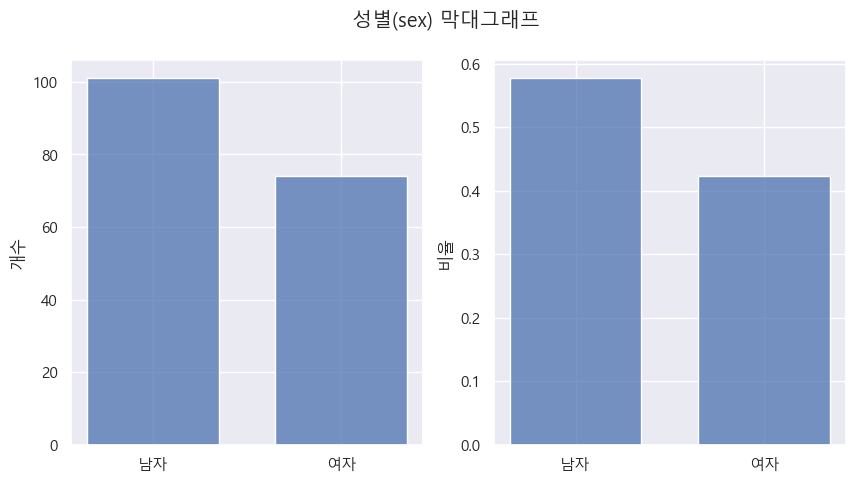

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("성별(sex) 막대그래프")
sns.histplot(x = "sex",
             shrink = 0.7,
             data = online_df,
             ax = ax[0])
ax[0].set(xlabel = "",
          ylabel = "개수")
sns.histplot(x = "sex",
             stat = "probability",
             shrink = 0.7,
             data = online_df,
             ax = ax[1])
ax[1].set(xlabel = "",
          ylabel = "비율")
plt.show()

### Q4.학력(school)의 돗수분포표, 막대그래프(돗수), 막대그래프(비율)

In [13]:
### crosstab이용
freq_table = pd.crosstab(index = online_df["school"],  
                         columns = ['count'])                  
freq_table['prop'] = np.round(freq_table['count']/sum(freq_table['count']), 2)  
freq_table['cum_prop'] = np.cumsum(freq_table['prop'])
freq_table

col_0,count,prop,cum_prop
school,,,
고졸,36,0.21,0.21
고졸이하,26,0.15,0.36
대졸이상,62,0.35,0.71
대학생,51,0.29,1.00


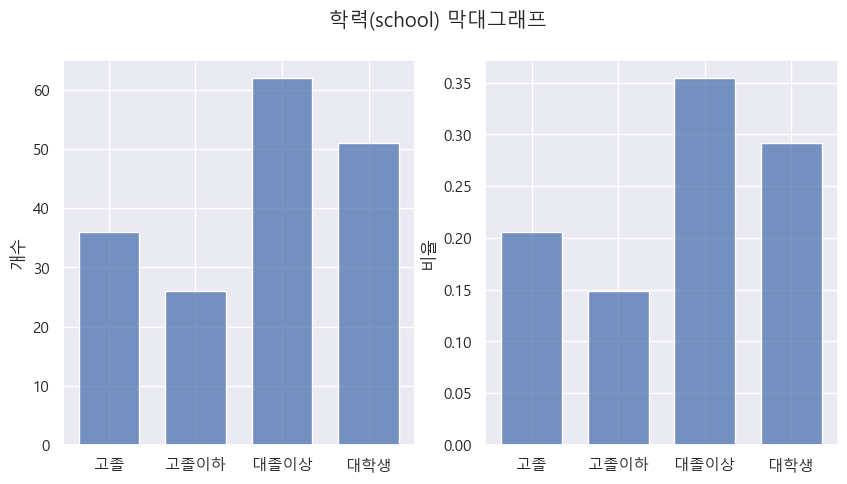

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("학력(school) 막대그래프")
sns.histplot(x = "school",
             shrink = 0.7,
             data = online_df,
             ax = ax[0])
ax[0].set(xlabel = "",
          ylabel = "개수")
sns.histplot(x = "school",
             stat = "probability",
             shrink = 0.7,
             data = online_df,
             ax = ax[1])
ax[1].set(xlabel = "",
          ylabel = "비율")
plt.show()

### Q5.성별(sex)과 학력(school)의 이원분할표, 막대그래프

In [15]:
cross_table = pd.crosstab(index = online_df["sex"],  
                          columns = online_df["school"],
                          margins = True) 
cross_table.index = ["남자","여자", "열전체"]
cross_table.columns = ["고졸","고졸이하","대졸이상","대학생", "행전체"]
cross_table

,고졸,고졸이하,대졸이상,대학생,행전체
남자,23,15,28,35,101
여자,13,11,34,16,74
열전체,36,26,62,51,175


In [16]:
cross_table_prop = cross_table/cross_table.loc["열전체","행전체"]
cross_table_prop

,고졸,고졸이하,대졸이상,대학생,행전체
남자,0.131429,0.085714,0.160000,0.200000,0.577143
여자,0.074286,0.062857,0.194286,0.091429,0.422857
열전체,0.205714,0.148571,0.354286,0.291429,1.000000


In [17]:
# 열비율
cross_table/cross_table.loc["열전체"]

,고졸,고졸이하,대졸이상,대학생,행전체
남자,0.638889,0.576923,0.451613,0.686275,0.577143
여자,0.361111,0.423077,0.548387,0.313725,0.422857
열전체,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# 행비율
cross_table.div(cross_table["행전체"], axis=0)

,고졸,고졸이하,대졸이상,대학생,행전체
남자,0.227723,0.148515,0.277228,0.346535,1.0
여자,0.175676,0.148649,0.459459,0.216216,1.0
열전체,0.205714,0.148571,0.354286,0.291429,1.0


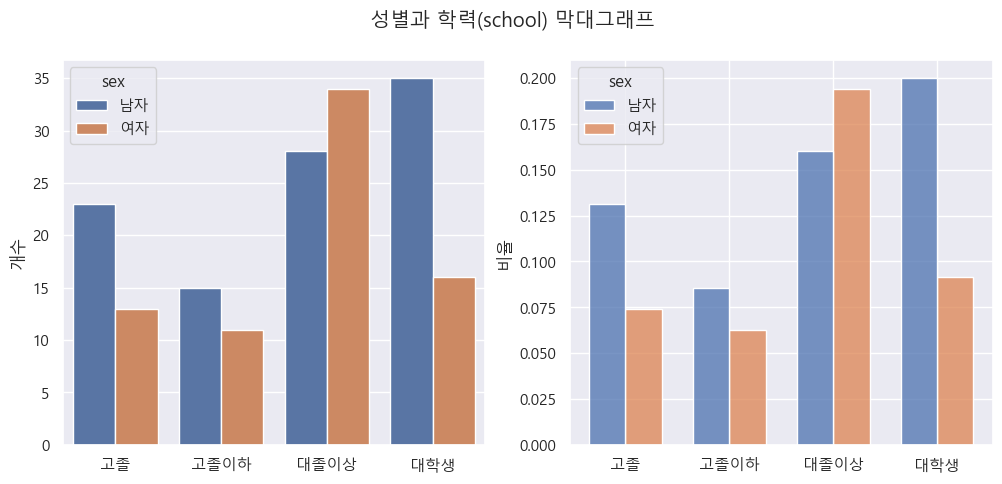

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))
fig.suptitle("성별과 학력(school) 막대그래프")
sns.countplot(x = "school",
             hue = "sex",
             data = online_df,
             ax = ax[0])
ax[0].set(xlabel = "",
          ylabel = "개수")
sns.histplot(x = "school",
             hue = "sex",
             stat = "probability",
             shrink = 0.7,
             multiple = "dodge",
             data = online_df,
             ax = ax[1])
ax[1].set(xlabel = "",
          ylabel = "비율")
plt.show()